# Análise de Remuneração de Docentes por UF nas Regiões do Brasil

Este notebook realiza uma análise detalhada das diferenças de remuneração entre os estados (UFs) dentro de cada região do Brasil, identificando disparidades intrarregionais e padrões específicos.

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Para exibir valores sem notação científica
pd.set_option('display.float_format', '{:.2f}'.format)

## 1. Carregamento e Preparação dos Dados

Vamos carregar os dados já processados de remuneração docente.

In [3]:
# Definir o caminho do arquivo processado
arquivo = 'datasets/remuneracao_por_regioes.xlsx'

# Verificar se o arquivo existe
if not os.path.exists(arquivo):
    print(f"Arquivo {arquivo} não encontrado! Execute primeiro o script 'processar_remuneracao_por_regioes.py'")
else:
    # Carregar os dados completos
    df = pd.read_excel(arquivo, sheet_name='Dados_Completos')
    
    # Mostrar as primeiras linhas
    print(f"Dados carregados: {df.shape[0]} registros e {df.shape[1]} colunas")
    df.head()

Dados carregados: 243 registros e 14 colunas


In [4]:
# Verificar regiões e UFs disponíveis
print("Regiões disponíveis:")
print(df['Região'].unique())

print("\nUFs por região:")
for regiao in sorted(df['Região'].unique()):
    ufs = df[df['Região'] == regiao]['UF'].unique()
    print(f"{regiao}: {', '.join(ufs)}")

Regiões disponíveis:
['Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-Oeste']

UFs por região:
Centro-Oeste: MS, MT, GO, DF
Nordeste: MA, PI, CE, RN, PB, PE, AL, SE, BA
Norte: RO, AC, AM, RR, PA, AP, TO
Sudeste: MG, ES, RJ, SP
Sul: PR, SC, RS


## 2. Análise por Região e UF

Vamos analisar as diferenças de remuneração entre os estados dentro de cada região.

In [5]:
# Calcular estatísticas por UF
df_uf = df.groupby(['Região', 'UF'])['Rem_40h_Final'].agg(['mean', 'median', 'std']).reset_index()
df_uf.columns = ['Região', 'UF', 'Remuneração Média', 'Remuneração Mediana', 'Desvio Padrão']

# Ordenar por região e remuneração média
df_uf = df_uf.sort_values(['Região', 'Remuneração Média'], ascending=[True, False])
df_uf

,Região,UF,Remuneração Média,Remuneração Mediana,Desvio Padrão
0,Centro-Oeste,DF,6557.48,7143.61,1588.87
2,Centro-Oeste,MS,5127.61,4247.74,1661.83
3,Centro-Oeste,MT,3871.64,4258.90,1199.89
1,Centro-Oeste,GO,3591.27,3210.35,1202.86
7,Nordeste,MA,4849.49,4338.38,2612.15
5,Nordeste,BA,4518.98,3791.86,2101.84
12,Nordeste,SE,3875.05,5153.30,1707.12
11,Nordeste,RN,3692.79,4156.20,1555.97
10,Nordeste,PI,3138.62,3272.62,793.41
9,Nordeste,PE,2912.32,2704.76,797.94


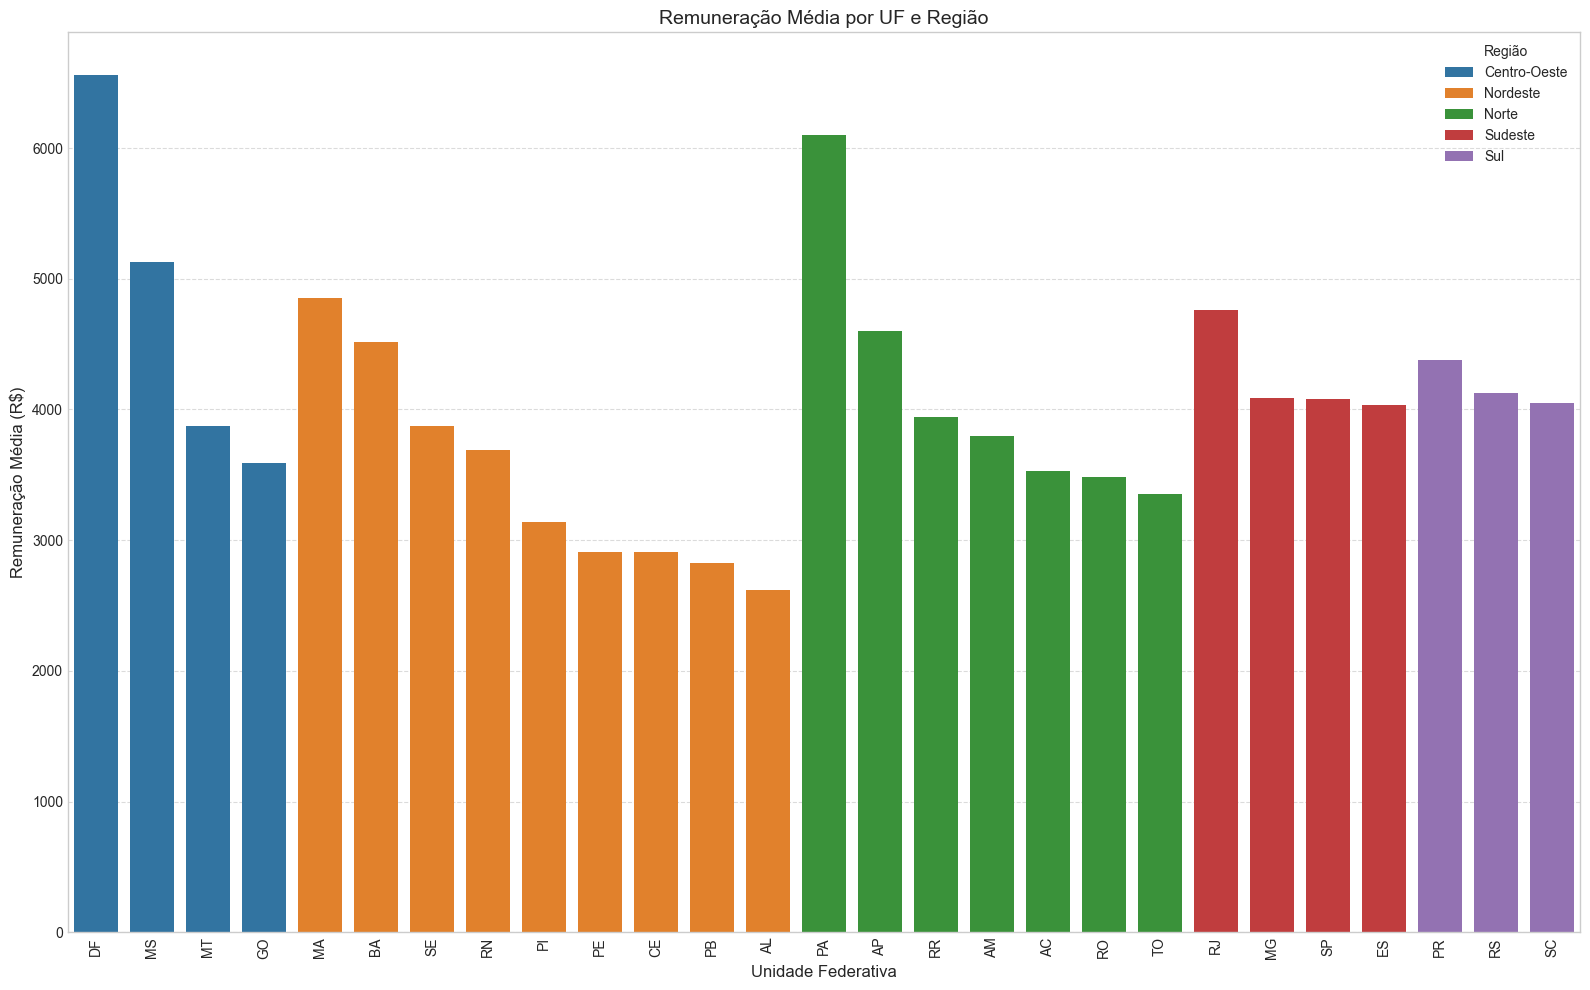

In [6]:
# Visualização: Remuneração média por UF em cada região
plt.figure(figsize=(16, 10))
sns.barplot(x='UF', y='Remuneração Média', hue='Região', data=df_uf)
plt.title('Remuneração Média por UF e Região')
plt.xlabel('Unidade Federativa')
plt.ylabel('Remuneração Média (R$)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 3. Disparidades Intrarregionais

Vamos analisar as disparidades de remuneração dentro de cada região.

In [7]:
# Calcular estatísticas de disparidade por região
disparidades = []

for regiao in sorted(df['Região'].unique()):
    dados_regiao = df_uf[df_uf['Região'] == regiao]
    if len(dados_regiao) < 2:  # Precisa de pelo menos dois estados para comparar
        continue
        
    # Encontrar valores máximos e mínimos
    max_uf = dados_regiao.loc[dados_regiao['Remuneração Média'].idxmax()]
    min_uf = dados_regiao.loc[dados_regiao['Remuneração Média'].idxmin()]
    
    # Calcular diferença absoluta e percentual
    diferenca_abs = max_uf['Remuneração Média'] - min_uf['Remuneração Média']
    diferenca_pct = (diferenca_abs / min_uf['Remuneração Média']) * 100
    
    # Calcular coeficiente de variação entre os estados
    cv = (dados_regiao['Remuneração Média'].std() / dados_regiao['Remuneração Média'].mean()) * 100
    
    disparidades.append({
        'Região': regiao,
        'UF Maior Remuneração': max_uf['UF'],
        'Maior Remuneração (R$)': max_uf['Remuneração Média'],
        'UF Menor Remuneração': min_uf['UF'],
        'Menor Remuneração (R$)': min_uf['Remuneração Média'],
        'Diferença (R$)': diferenca_abs,
        'Diferença (%)': diferenca_pct,
        'Coeficiente de Variação (%)': cv,
        'Número de UFs': len(dados_regiao)
    })

# Criar DataFrame de disparidades
df_disparidades = pd.DataFrame(disparidades)
df_disparidades = df_disparidades.sort_values('Diferença (%)', ascending=False)
df_disparidades

,Região,UF Maior Remuneração,Maior Remuneração (R$),UF Menor Remuneração,Menor Remuneração (R$),Diferença (R$),Diferença (%),Coeficiente de Variação (%),Número de UFs
1,Nordeste,MA,4849.49,AL,2620.35,2229.14,85.07,22.90,9
0,Centro-Oeste,DF,6557.48,GO,3591.27,2966.20,82.59,28.33,4
2,Norte,PA,6096.59,TO,3353.20,2743.39,81.81,23.53,7
3,Sudeste,RJ,4763.51,ES,4032.17,731.35,18.14,8.24,4
4,Sul,PR,4380.63,SC,4049.71,330.93,8.17,4.15,3


C:\Users\Deyvid\AppData\Local\Temp\ipykernel_23892\3019000828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Região', y='Diferença (%)', data=df_disparidades, palette='viridis')


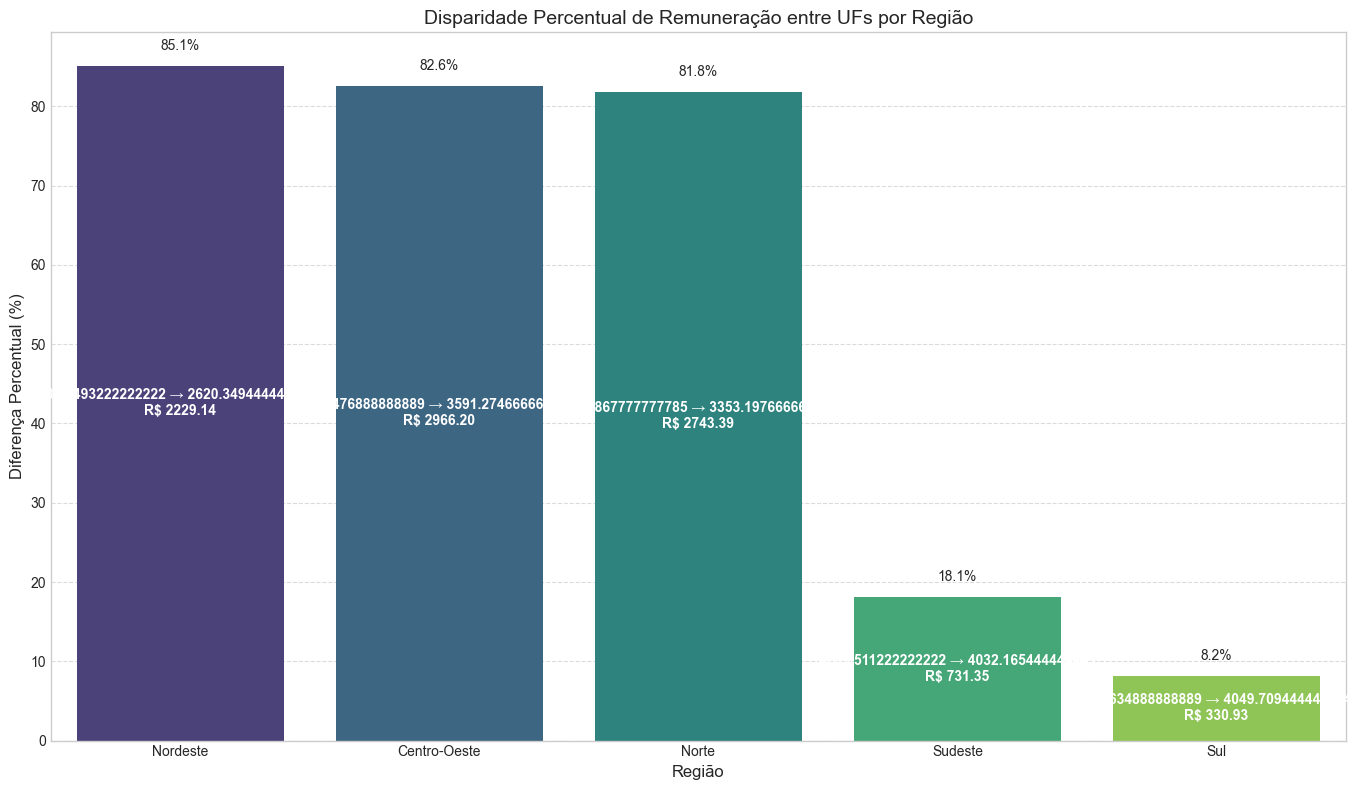

In [8]:
# Visualização: Disparidade percentual entre UFs por região
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Região', y='Diferença (%)', data=df_disparidades, palette='viridis')
plt.title('Disparidade Percentual de Remuneração entre UFs por Região')
plt.xlabel('Região')
plt.ylabel('Diferença Percentual (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos
for i, row in enumerate(df_disparidades.itertuples()):
    plt.text(i, row._7 + 2, f"{row._7:.1f}%", ha='center')
    plt.text(i, row._7/2, f"{row._3} → {row._5}\nR$ {row._6:.2f}", ha='center', va='center',
             color='white', fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Análise por UF e Rede de Ensino

Vamos analisar as diferenças de remuneração por rede de ensino em cada UF.

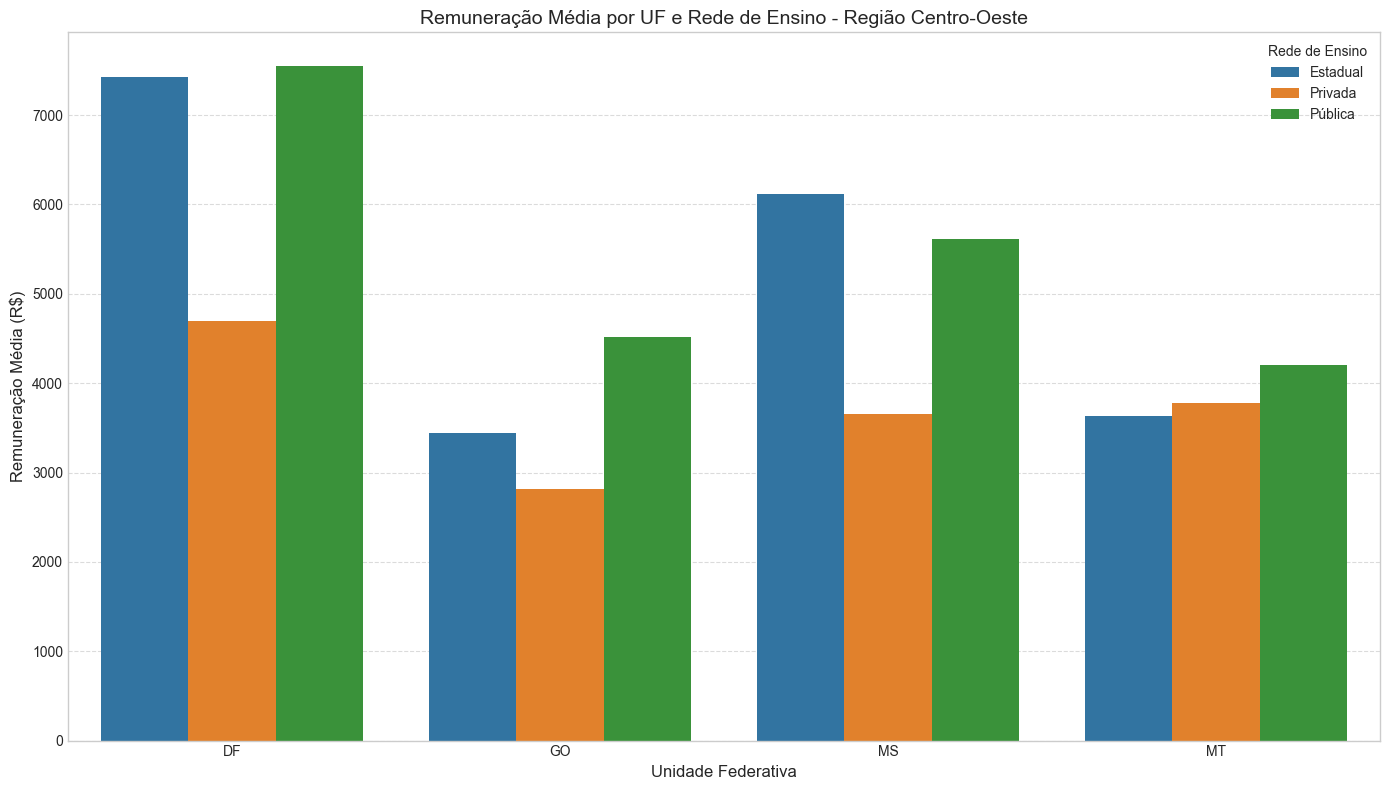

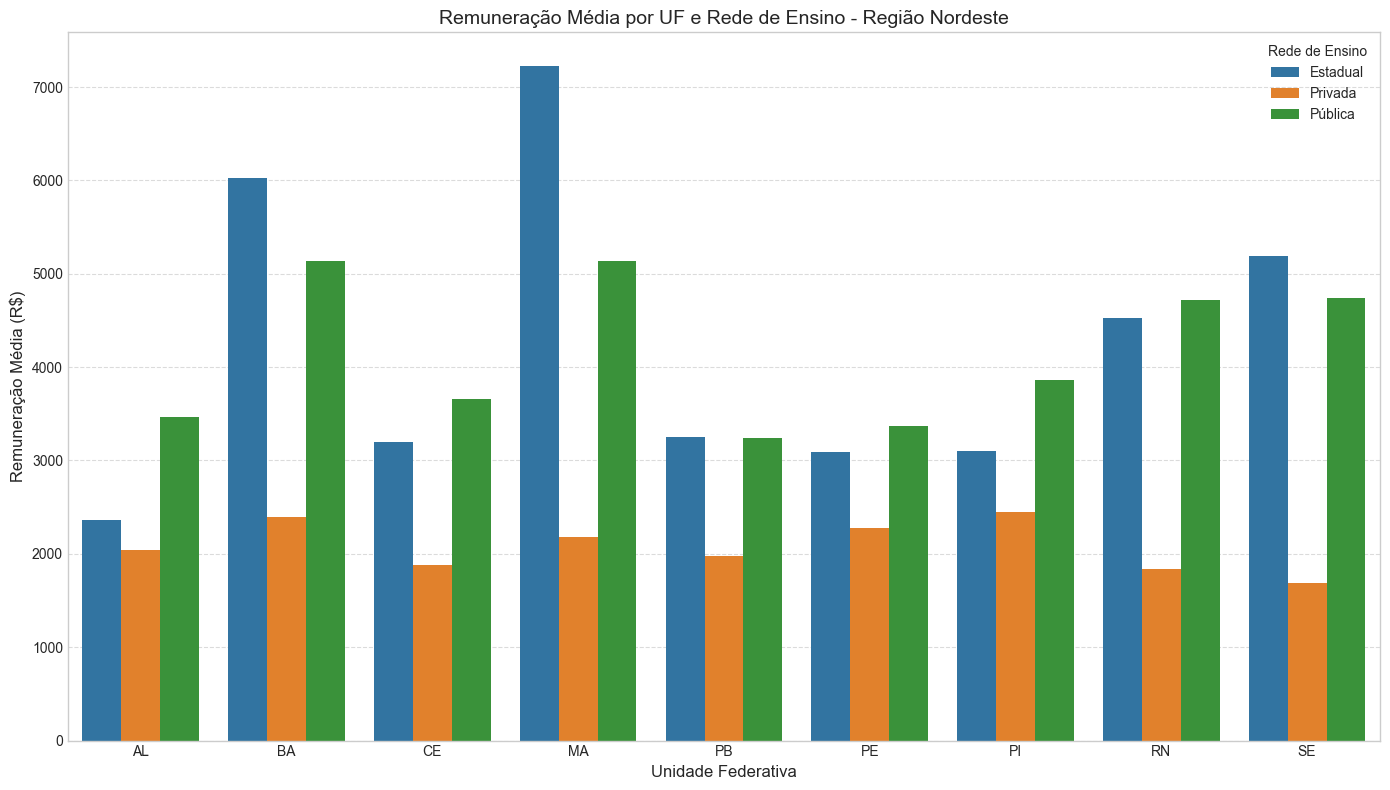

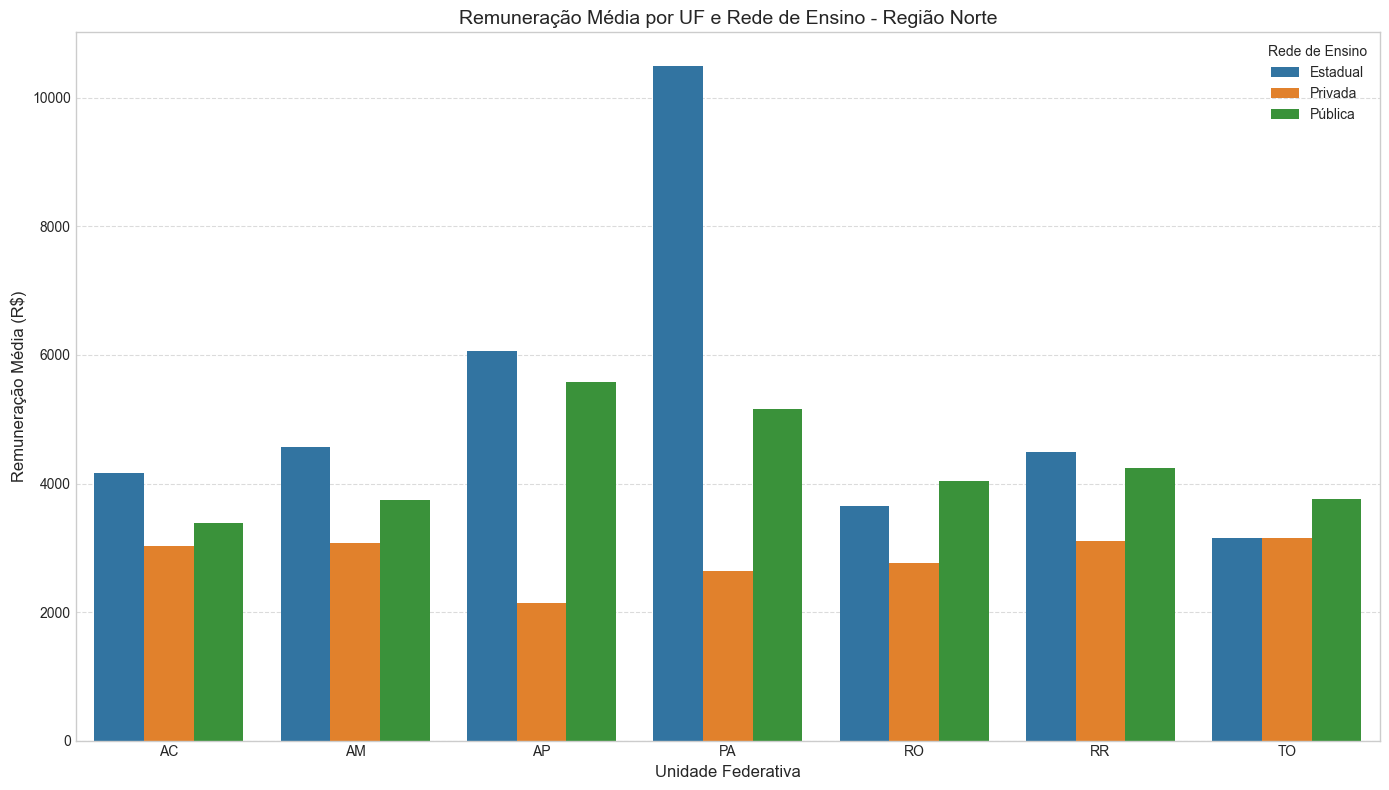

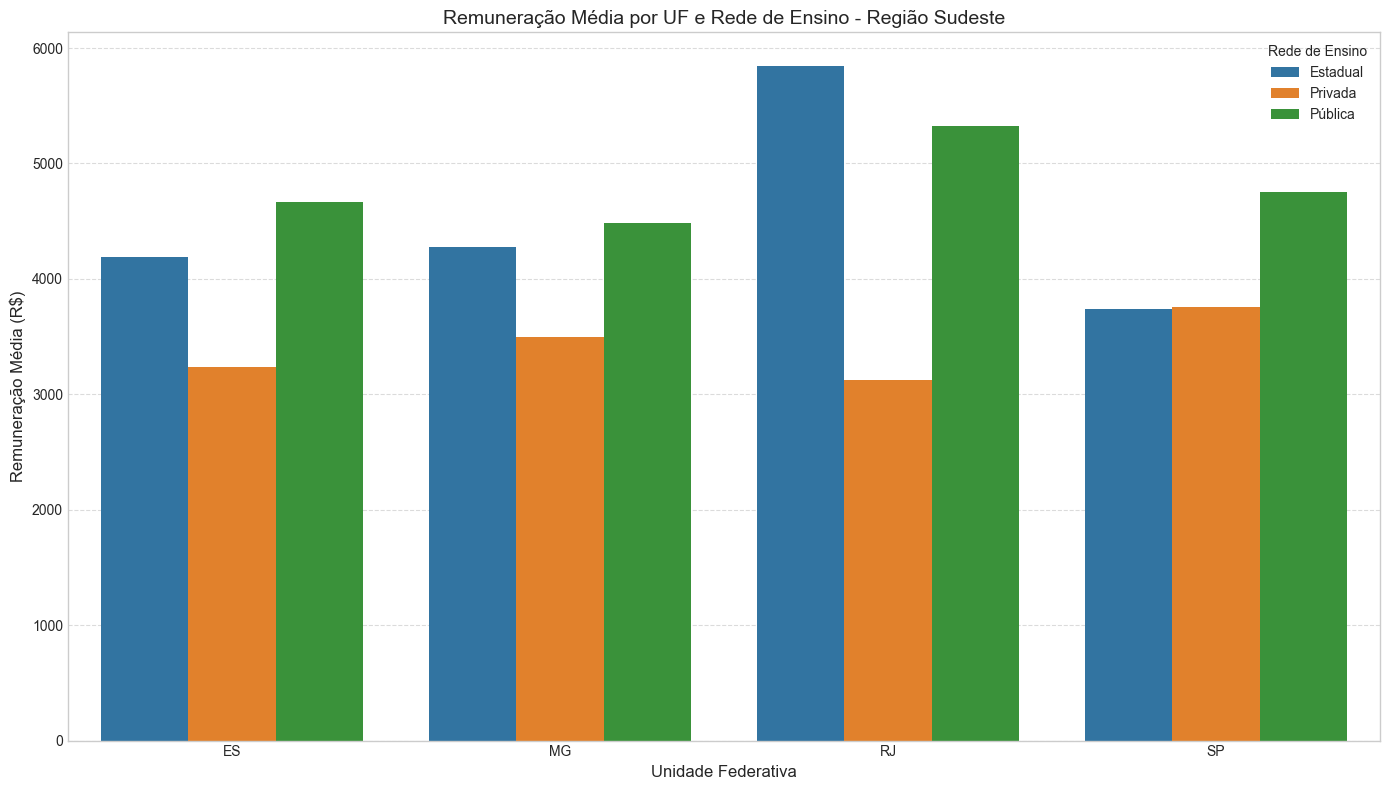

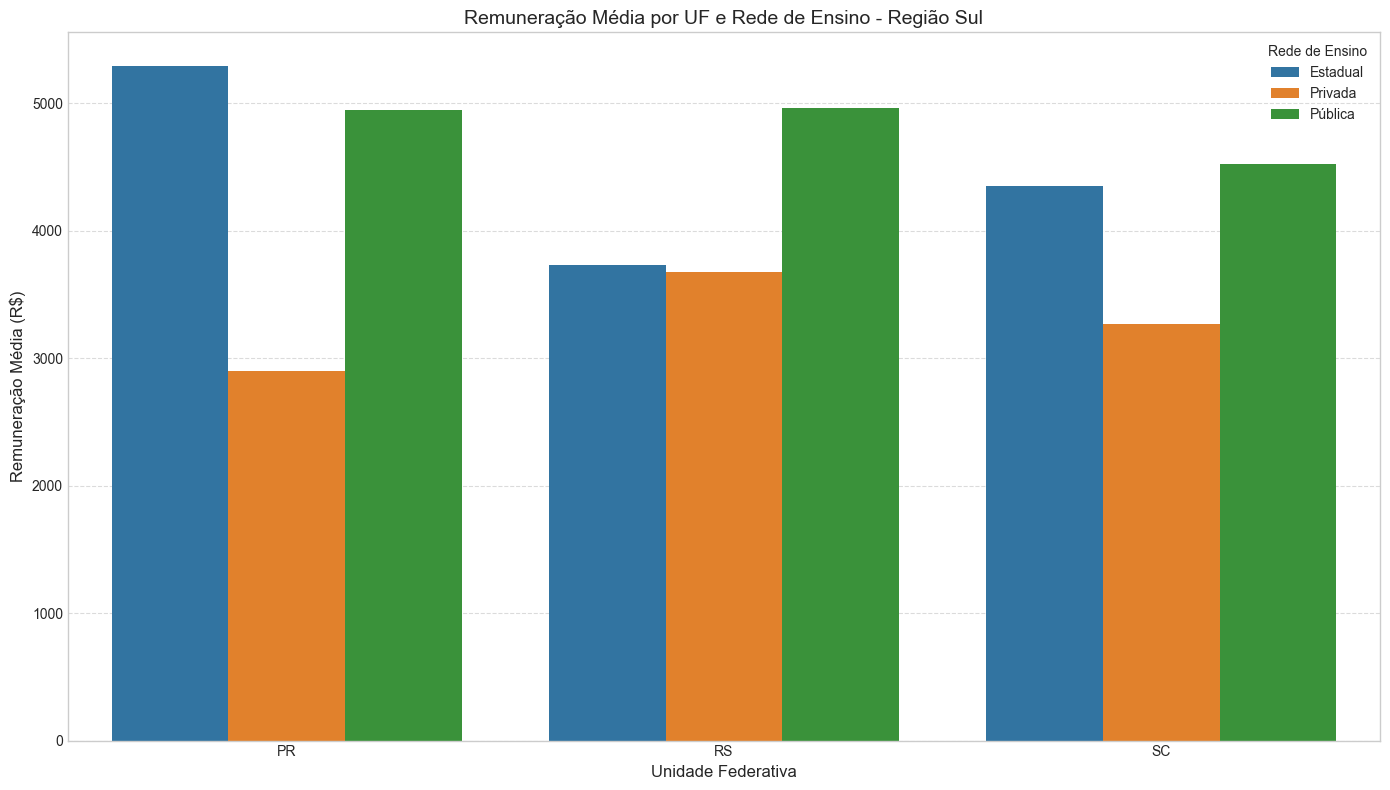

In [9]:
# Calcular médias por UF e rede de ensino
df_uf_rede = df.groupby(['Região', 'UF', 'Rede'])['Rem_40h_Final'].mean().reset_index()
df_uf_rede = df_uf_rede.rename(columns={'Rem_40h_Final': 'Remuneração Média'})

# Verificar disparidade entre redes por UF
for regiao in sorted(df['Região'].unique()):
    dados_regiao = df_uf_rede[df_uf_rede['Região'] == regiao]
    
    plt.figure(figsize=(14, 8))
    
    # Criar gráfico específico para a região
    ax = sns.barplot(x='UF', y='Remuneração Média', hue='Rede', data=dados_regiao)
    
    plt.title(f'Remuneração Média por UF e Rede de Ensino - Região {regiao}')
    plt.xlabel('Unidade Federativa')
    plt.ylabel('Remuneração Média (R$)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Rede de Ensino')
    plt.tight_layout()
    plt.show()

## 5. Análise por UF e Formação

Vamos analisar as diferenças de remuneração por formação em cada UF.

In [10]:
# Calcular médias por UF e formação
df_uf_formacao = df.groupby(['Região', 'UF', 'Formação'])['Rem_40h_Final'].mean().reset_index()
df_uf_formacao = df_uf_formacao.rename(columns={'Rem_40h_Final': 'Remuneração Média'})

# Calcular diferença percentual entre docentes com e sem formação superior por UF
dif_formacao = []

for (regiao, uf), dados in df_uf_formacao.groupby(['Região', 'UF']):
    if len(dados) < 2:  # Precisa de ambas formações para comparar
        continue
        
    # Encontrar valores para cada formação
    try:
        rem_com_sup = dados[dados['Formação'] == 'Com Superior']['Remuneração Média'].values[0]
        rem_sem_sup = dados[dados['Formação'] == 'Sem Superior']['Remuneração Média'].values[0]
        
        # Calcular diferença percentual
        diferenca_pct = ((rem_com_sup - rem_sem_sup) / rem_sem_sup) * 100
        
        dif_formacao.append({
            'Região': regiao,
            'UF': uf,
            'Remuneração Com Superior': rem_com_sup,
            'Remuneração Sem Superior': rem_sem_sup,
            'Diferença (R$)': rem_com_sup - rem_sem_sup,
            'Diferença (%)': diferenca_pct
        })
    except:
        pass

# Criar DataFrame de disparidades por formação
df_dif_formacao = pd.DataFrame(dif_formacao)
df_dif_formacao = df_dif_formacao.sort_values(['Região', 'Diferença (%)'], ascending=[True, False])
df_dif_formacao

,Região,UF,Remuneração Com Superior,Remuneração Sem Superior,Diferença (R$),Diferença (%)
3,Centro-Oeste,MT,4685.02,2387.62,2297.40,96.22
1,Centro-Oeste,GO,4243.38,2399.00,1844.38,76.88
2,Centro-Oeste,MS,5904.88,3638.78,2266.10,62.28
0,Centro-Oeste,DF,6979.68,5762.87,1216.80,21.11
5,Nordeste,BA,5441.90,2965.67,2476.24,83.50
7,Nordeste,MA,5829.65,3241.41,2588.23,79.85
9,Nordeste,PE,3409.52,2098.46,1311.05,62.48
8,Nordeste,PB,3288.88,2035.70,1253.17,61.56
4,Nordeste,AL,2995.33,2029.76,965.56,47.57
10,Nordeste,PI,3526.64,2477.87,1048.76,42.33


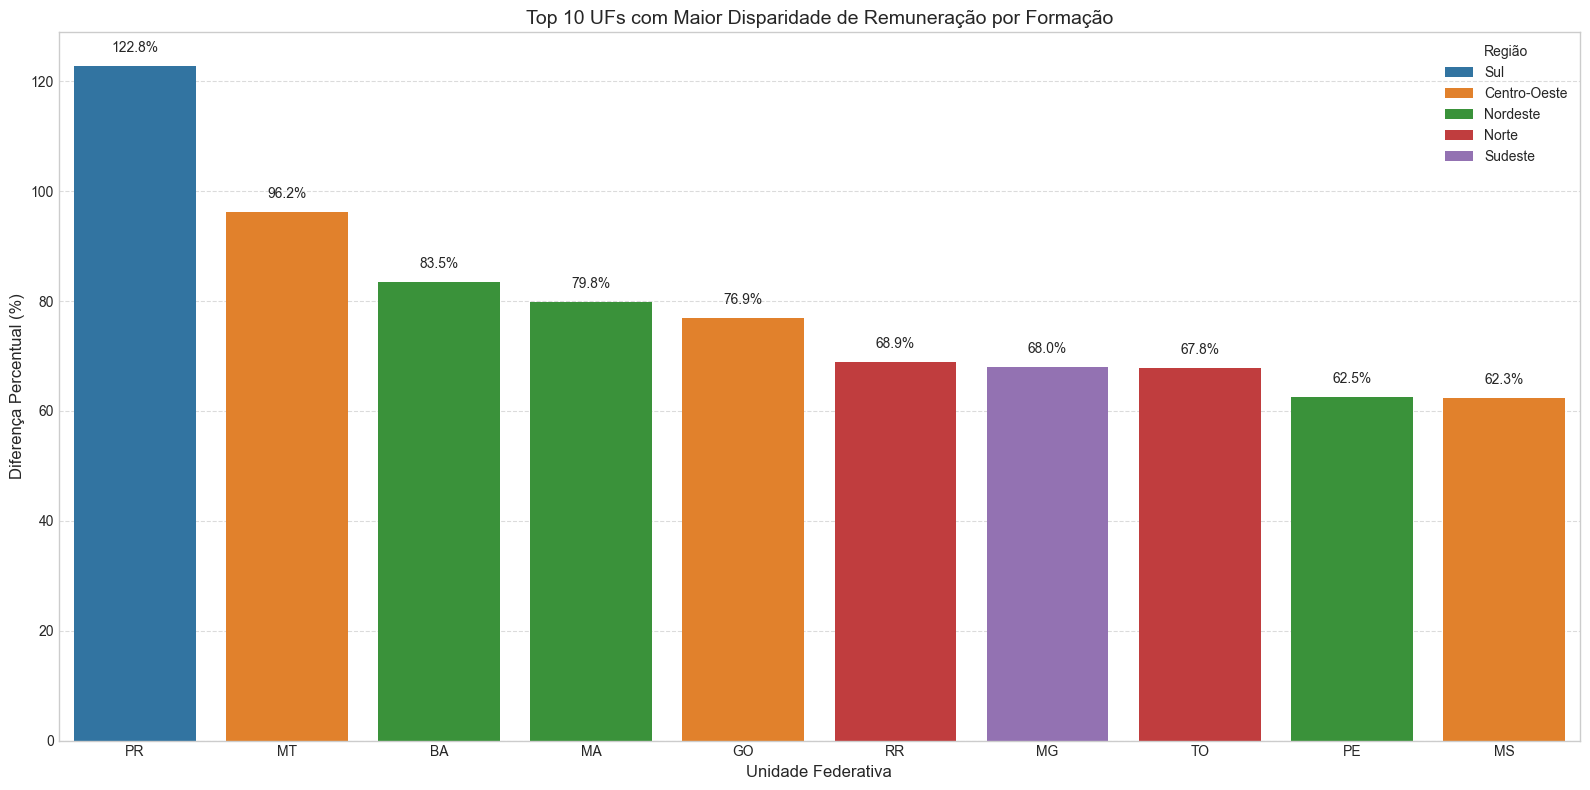

In [11]:
# Visualização: Top 10 UFs com maior disparidade por formação
top_formacao = df_dif_formacao.sort_values('Diferença (%)', ascending=False).head(10)
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='UF', y='Diferença (%)', hue='Região', data=top_formacao)
plt.title('Top 10 UFs com Maior Disparidade de Remuneração por Formação')
plt.xlabel('Unidade Federativa')
plt.ylabel('Diferença Percentual (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos
for i, row in enumerate(top_formacao.itertuples()):
    plt.text(i, row._6 + 2, f"{row._6:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 6. Posição das UFs no Ranking Nacional

Vamos analisar a posição de cada UF no ranking nacional de remuneração docente.

In [12]:
# Criar ranking nacional de UFs
ranking_nacional = df.groupby(['Região', 'UF'])['Rem_40h_Final'].mean().reset_index()
ranking_nacional = ranking_nacional.sort_values('Rem_40h_Final', ascending=False)
ranking_nacional['Posição Nacional'] = range(1, len(ranking_nacional) + 1)
ranking_nacional['Remuneração (R$)'] = ranking_nacional['Rem_40h_Final']
ranking_nacional = ranking_nacional.drop('Rem_40h_Final', axis=1)

# Calcular quartis
total_ufs = len(ranking_nacional)
quartil_limites = [
    total_ufs // 4,           # 1º quartil
    total_ufs // 2,           # 2º quartil (mediana)
    total_ufs * 3 // 4        # 3º quartil
]

# Adicionar classificação por quartil
def classificar_quartil(posicao):
    if posicao <= quartil_limites[0]:
        return "1º Quartil (Melhor)"
    elif posicao <= quartil_limites[1]:
        return "2º Quartil"
    elif posicao <= quartil_limites[2]:
        return "3º Quartil"
    else:
        return "4º Quartil (Pior)"

ranking_nacional['Quartil'] = ranking_nacional['Posição Nacional'].apply(classificar_quartil)
ranking_nacional

,Região,UF,Posição Nacional,Remuneração (R$),Quartil
0,Centro-Oeste,DF,1,6557.48,1º Quartil (Melhor)
16,Norte,PA,2,6096.59,1º Quartil (Melhor)
2,Centro-Oeste,MS,3,5127.61,1º Quartil (Melhor)
7,Nordeste,MA,4,4849.49,1º Quartil (Melhor)
22,Sudeste,RJ,5,4763.51,1º Quartil (Melhor)
15,Norte,AP,6,4597.15,1º Quartil (Melhor)
5,Nordeste,BA,7,4518.98,2º Quartil
24,Sul,PR,8,4380.63,2º Quartil
25,Sul,RS,9,4124.77,2º Quartil
21,Sudeste,MG,10,4085.32,2º Quartil


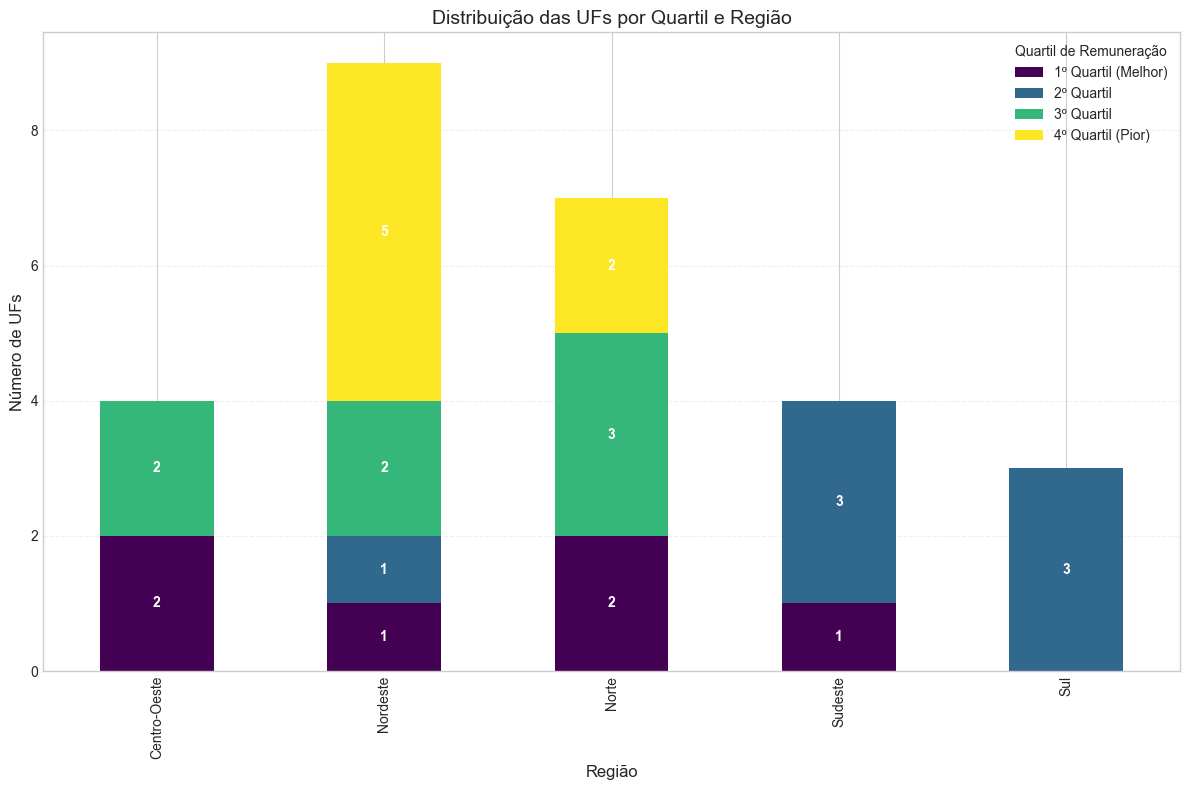

In [13]:
# Visualização: Distribuição das UFs por Quartil e Região
quartil_por_regiao = pd.crosstab(ranking_nacional['Região'], ranking_nacional['Quartil'])

# Padronizar colunas na ordem correta
colunas_ordem = ["1º Quartil (Melhor)", "2º Quartil", "3º Quartil", "4º Quartil (Pior)"]
for col in colunas_ordem:
    if col not in quartil_por_regiao.columns:
        quartil_por_regiao[col] = 0
quartil_por_regiao = quartil_por_regiao[colunas_ordem]

# Criar visualização de barras empilhadas
quartil_por_regiao.plot(kind='bar', stacked=True, figsize=(12, 8), 
                        colormap='viridis')
plt.title('Distribuição das UFs por Quartil e Região')
plt.xlabel('Região')
plt.ylabel('Número de UFs')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Quartil de Remuneração')

# Adicionar rótulos com a quantidade de UFs em cada barra
for i, regiao in enumerate(quartil_por_regiao.index):
    acumulado = 0
    for col in colunas_ordem:
        valor = quartil_por_regiao.loc[regiao, col]
        if valor > 0:
            plt.text(i, acumulado + valor/2, str(int(valor)), 
                     ha='center', va='center', color='white', fontweight='bold')
            acumulado += valor

plt.tight_layout()
plt.show()

## 7. Conclusões e Insights

Vamos resumir os principais achados da análise por UF nas regiões do Brasil.

In [14]:
# Resumo das estatísticas por região
resumo_geral = df.groupby('Região').agg({
    'Rem_40h_Final': ['mean', 'median', 'std', 'min', 'max'],
    'UF': 'nunique'
})

resumo_geral.columns = ['Média (R$)', 'Mediana (R$)', 'Desvio Padrão (R$)', 
                        'Mínimo (R$)', 'Máximo (R$)', 'Número de UFs']
resumo_geral

,Média (R$),Mediana (R$),Desvio Padrão (R$),Mínimo (R$),Máximo (R$),Número de UFs
Região,,,,,,
Centro-Oeste,4787.00,4372.10,1813.02,1795.97,7755.04,4
Nordeste,3482.43,3381.28,1609.14,1273.82,8819.63,9
Norte,4113.21,3750.22,1882.32,1644.23,11466.52,7
Sudeste,4240.78,4297.91,1072.36,2063.09,6039.12,4
Sul,4185.04,3932.80,1361.50,1955.26,6945.91,3


In [15]:
# Exportar dados consolidados
arquivo_saida = 'remuneracao_UFs_por_regiao.xlsx'

with pd.ExcelWriter(arquivo_saida) as writer:
    # Ranking nacional
    ranking_nacional.to_excel(writer, sheet_name='Ranking_Nacional', index=False)
    
    # Estatísticas por UF
    df_uf.to_excel(writer, sheet_name='Estatisticas_por_UF', index=False)
    
    # Disparidades intrarregionais
    df_disparidades.to_excel(writer, sheet_name='Disparidades_Regionais', index=False)
    
    # Diferenças por formação
    df_dif_formacao.to_excel(writer, sheet_name='Disparidades_Formacao', index=False)
    
    # Resumo geral por região
    resumo_geral.to_excel(writer, sheet_name='Resumo_Geral')

print(f"Dados consolidados exportados para '{arquivo_saida}'")

Dados consolidados exportados para 'remuneracao_UFs_por_regiao.xlsx'


### Principais Insights:

1. **Disparidades Intrarregionais**: Encontramos diferenças significativas entre estados da mesma região, com casos onde a remuneração mais alta chega a ser até 50% maior que a mais baixa.

2. **Distribuição por Quartis**: A análise do posicionamento das UFs no ranking nacional revela concentração de estados de determinadas regiões nos quartis superiores e inferiores.

3. **Variação por Rede de Ensino**: Mesmo dentro da mesma região, estados vizinhos podem apresentar padrões opostos na relação entre remuneração nas redes pública e privada.

4. **Valorização da Formação Superior**: Identificamos os estados onde a diferença salarial por formação é mais expressiva, indicando diferentes políticas de valorização profissional.

5. **Casos Atípicos**: Alguns estados apresentam características distintas do padrão regional, sugerindo a influência de fatores locais específicos nas políticas de remuneração docente.